In [98]:
import numpy as np
import matplotlib.pyplot as plt
import cmath

def alpha(x, z):
    lamb, mu, rho = params(x,z)
    return np.sqrt((lamb+2*mu)/rho)

def params(x, z):      
    if z<L/2:
        return [lamb1, mu1, rho1]
    else:
        return [lamb2, mu2, rho2]

def phi_space_plane(x, z, vert = True):
    return np.exp(complex(0,1)*(-alpha(x,z)*z)) if vert else np.exp(complex(0,1)*(-alpha(x,z)*x))

def phi_space_sphere(x,z):
    r = np.sqrt(x**2+z**2)
    return (1/r)*np.exp(complex(0,1)*(-k*r))

def phi_time(x,z,t,verti, sphere=False):
    return phi_space_plane(x, z, vert = verti)*np.exp(complex(0,1)*alpha(x,z)*t) if not sphere else phi_space_sphere(x, z)*np.exp(complex(0,1)*alpha(x,z)*t)

def f(x,z,t):
    h = []
    for e in x:
        v = []
        for k in z:
            v.append(phi_time(e,k,t,True,False).real)
        h.append(v)
    return h

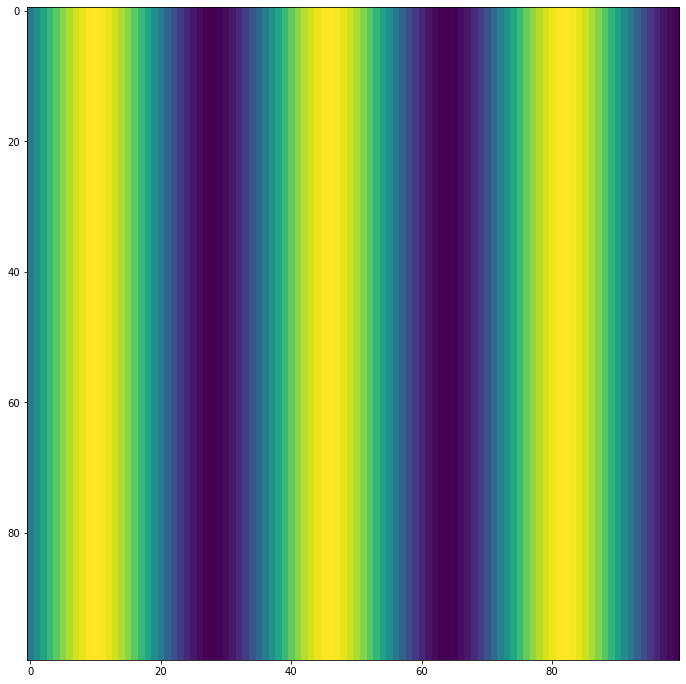

In [99]:
# ------------------------------
L = 10
xlst = np.linspace(0, L, 100)
zlst = np.linspace(0, L, 100)
xv, zv = np.meshgrid(xlst, zlst)
t = np.linspace(0,100,100)

lamb1, mu1, rho1 = 1, 1, 1
lamb2, mu2, rho2 = 1, 1, 1

# ------------------------------

fig1, ax1 = plt.subplots()
ax1.imshow(f(xlst,zlst,t[1]))
fig1.set_size_inches(12,12)
fig1.show()

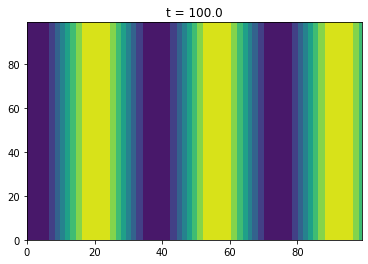

In [97]:
from matplotlib.animation import FuncAnimation

fig = plt.figure()

cont = plt.contourf(f(xlst,zlst,t[0]))

# animationof the f function
def animate(i):
    global cont
    for c in cont.collections:
        c.remove()  # removes only the contours, leaves the rest intact
    cont = plt.contourf(f(xlst,zlst, i))
    plt.title('t = {}'.format(i))
    return cont

anim = animation.FuncAnimation(fig, animate, frames=t, repeat=False)
anim.save('wave_animation.gif', writer=animation.FFMpegWriter())

In [ ]:
def phi_spherical(r,t):
    """
    solution to the spherical wave case
    """
    B = 1
    omega = 1
    nu = 1

    return B/r*np.exp(complex(0,1)*(omega*t-nu*r))